In [330]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb 

import math as math

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from scipy.stats import pearsonr

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

In [331]:
dataset = pd.read_csv("./data/all_features.csv")
dataset.columns

Index(['SNo', 'ON/OFF', 'Switch_sequence', 'Trigger_sequence', 'Dot_Bracket',
       'toehold_domain_db', 'stemb_asc_db', 'loop2_asc_db', 'stemt_asc_db',
       'loop1_db', 'stemt_desc_db', 'start_db', 'stemb_desc_db',
       'horizontal_linker_domain_db', 'toehold_domain_seq', 'stemb_asc_seq',
       'loop2_asc_seq', 'stemt_asc_seq', 'loop1_seq', 'stemt_desc_seq',
       'start_seq', 'stemb_desc_seq', 'horizontal_linker_domain_seq',
       'Toehold_domain+Bottom_stem', 'Bottom_stem+Hlinker', 'RBS_linker_Seq',
       'toehold_dom_length', 'loop1_length', 'GC_top_stem', 'GC_bottom_stem',
       'Overall_MFE', 'MFE_top_stem', 'MFE_bottom_stem', 'SH_25', 'SH_37',
       'Switch_trigger_MFE', 'Bottom_region_MFE', 'Bottom_region_SH_25',
       'Bottom_region_SH_37', 'RBS_linker_MFE', 'Net_MFE', 'Freq_MFE_struct'],
      dtype='object')

In [346]:
featuresData = dataset[[
                        'ON/OFF',
                        'toehold_dom_length',
                        'loop1_length',
                        'GC_top_stem',
                        'GC_bottom_stem',
                        'Overall_MFE',
                        'MFE_top_stem',
                        'MFE_bottom_stem',
                        'SH_25',
                        'SH_37',
                        'Switch_trigger_MFE',
                        'Bottom_region_MFE',
                        'Bottom_region_SH_25',
                        'Bottom_region_SH_37',
                        'RBS_linker_MFE',
                        'Net_MFE',
                        'Freq_MFE_struct'
                    ]]

featuresData.head()

,ON/OFF,toehold_dom_length,loop1_length,GC_top_stem,GC_bottom_stem,Overall_MFE,MFE_top_stem,MFE_bottom_stem,SH_25,SH_37,Switch_trigger_MFE,Bottom_region_MFE,Bottom_region_SH_25,Bottom_region_SH_37,RBS_linker_MFE,Net_MFE,Freq_MFE_struct
0,292.0,15,11,2,4,-25.9,-3.6,-12.8,0.777559,0.845633,-78.5,-21.1,0.497575,0.581017,-10.3,31.7,0.135734
1,279.6,15,11,2,5,-26.6,-4.2,-13.9,1.366640,1.325370,-80.0,-20.9,1.237440,1.209900,-8.7,35.3,0.070442
2,265.3,15,11,1,4,-24.9,-2.6,-12.1,0.625739,1.073200,-79.1,-19.9,0.454941,0.873081,-6.4,36.9,0.078780
3,264.6,15,11,1,3,-21.5,-2.6,-10.9,0.680072,0.764909,-72.1,-17.2,0.517463,0.563034,-8.2,30.9,0.058033
4,253.0,15,11,2,5,-28.9,-4.2,-15.6,0.542289,0.654709,-73.5,-23.2,0.367332,0.489477,-9.3,30.2,0.212414


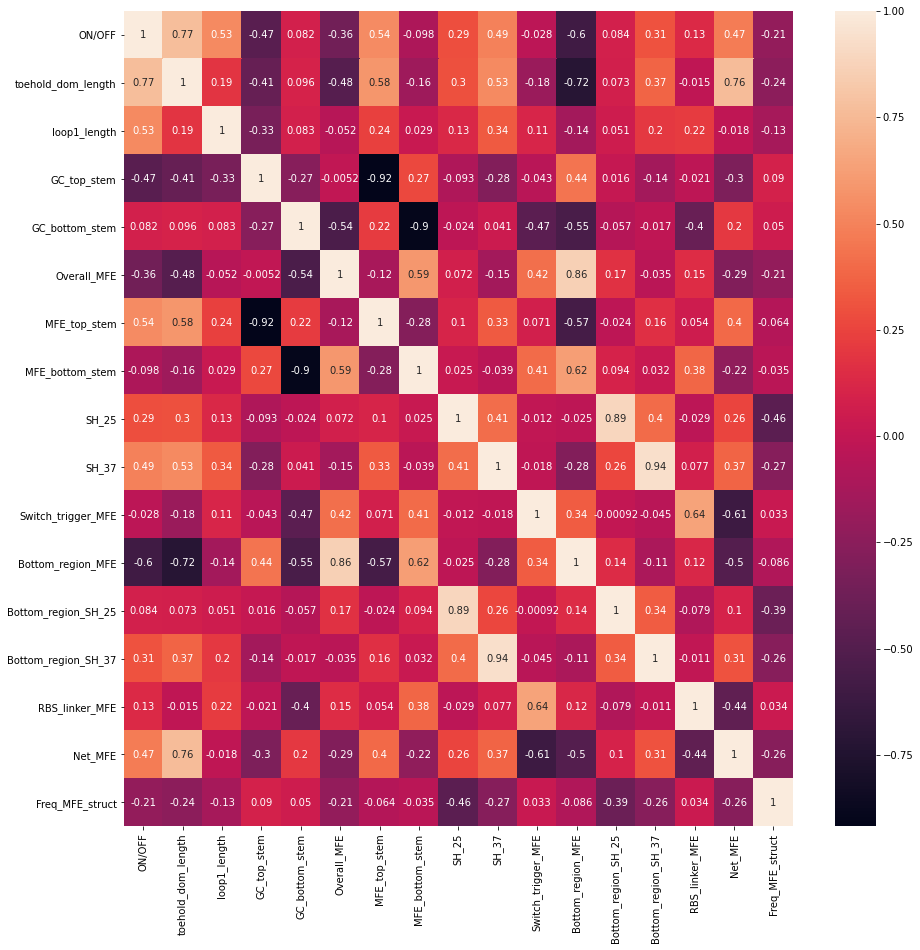

In [347]:
cMat = featuresData.corr()
fig, dataplot = plt.subplots(figsize=(15,15)) 
dataplot = sb.heatmap(cMat, annot=True)

In [334]:
selected = pd.read_csv("./data/selected_features.csv")
selected.columns

Index(['SNo', 'ON/OFF', 'Switch_sequence', 'Trigger_sequence', 'Overall_MFE',
       'Bottom_region_MFE', 'RBS_linker_MFE', 'Net_MFE', 'Freq_MFE_struct',
       'Overall_SH_37'],
      dtype='object')

In [335]:
selectedFeatures = selected[['Overall_MFE',
       'Bottom_region_MFE', 'RBS_linker_MFE', 'Net_MFE', 'Freq_MFE_struct',
       'Overall_SH_37']]

scaler = MinMaxScaler() 
selectedFeatures = scaler.fit_transform(selectedFeatures)
pd.DataFrame(selectedFeatures).head()

,0,1,2,3,4,5
0,0.711656,0.648515,0.465517,0.162234,0.319736,0.142857
1,0.668712,0.658416,0.603448,0.257979,0.155890,0.269318
2,0.773006,0.707921,0.801724,0.300532,0.176813,0.202845
3,0.981595,0.841584,0.646552,0.140957,0.124750,0.121578
4,0.527607,0.544554,0.551724,0.122340,0.512160,0.092529


In [336]:
Y = selected['ON/OFF']
# Y = np.log10(Y)
Y.head()

0    292.0
1    279.6
2    265.3
3    264.6
4    253.0
Name: ON/OFF, dtype: float64

In [337]:
X_train, X_test, y_train, y_test = train_test_split(selectedFeatures, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(182, 6) (182,)
(46, 6) (46,)


In [338]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

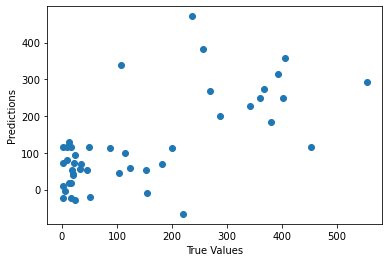

In [339]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [340]:
print(model.score(X_test, y_test))

0.4034426585053934


In [356]:
scores = cross_val_score(model, selectedFeatures, Y, cv=30)
print('Cross-validated scores:', scores)

Cross-validated scores: [-2.84845561e+01 -1.29674969e+01 -5.30775762e+00 -2.35799574e+02
 -3.39664354e+02 -6.45236571e+02 -6.53199461e+02 -1.35180779e+03
 -1.83591282e+03 -2.22332317e+03 -4.12017610e+04 -3.90910587e+04
 -1.80331192e+03 -2.25704513e+04 -1.99686011e+04 -8.56449172e+03
 -6.78384017e+03 -1.11070913e+05 -3.20036512e+05 -6.56417461e+05
 -1.00451620e+06 -3.44539654e-01 -2.37290090e+01 -4.03047223e-02
  1.59893803e-03 -9.93271861e-01 -1.39042449e+00 -4.33653494e-01
 -4.83236980e-01 -2.81467014e-01]


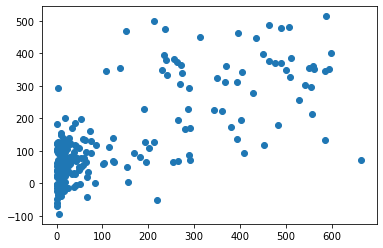

In [357]:
predictions = cross_val_predict(model, selectedFeatures, Y, cv=30)
plt.scatter(Y, predictions)

In [358]:
accuracy = metrics.r2_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.5312410371418663


In [344]:
selectedFeatures = sm.add_constant(selectedFeatures)
statsmodel = sm.OLS(Y,selectedFeatures).fit()
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ON/OFF   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     51.25
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.10e-39
Time:                        19:13:17   Log-Likelihood:                -1406.4
No. Observations:                 228   AIC:                             2827.
Df Residuals:                     221   BIC:                             2851.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        197.3560     63.845      3.091      0.002      71.533     323.179
x1           267.1500     84.223      3.172      0.002     101.167     433.133
x2          -662.7365     93.563     -7.083      0.000    -847.126    -478.347
x3           222.8343     46.340      4.809      0.000     131.509     314.160
x4           197.1782     66.343      2.972      0.003      66.432     327.925
x5          -130.4375     57.225     -2.279      0.024    -243.214     -17.661
x6           258.7718     63.428      4.080      0.000     133.770     383.774
==============================================================================
Omnibus:                       58.652   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.247
Skew:                           1.143   Prob(JB):                     2.37e-33
Kurtosis:                       6.254   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""